<a href="https://colab.research.google.com/github/Mano1498/Customer_Segmentation_Project/blob/main/Customer_segment(Kmeans).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### DIY K-Means: Developing a Custom Clustering Solution

In [15]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')

In [16]:
retail = pd.read_csv("/content/drive/MyDrive/DataSets/RFM2OnlineRetail.csv")

In [17]:
retail.head()

,CustomerID,Recency,Frequency,Monetary,R-Score,F-Score,M-Score,RFMScore,LoyaltyLevel
0,12820,2,59,942,1,2,2,5,Platinum
1,12821,213,6,93,4,4,4,12,Bronze
2,12822,70,46,949,3,2,2,7,Gold
3,12823,74,5,1760,3,4,1,8,Silver
4,12824,59,25,397,3,3,3,9,Silver


In [18]:
features = ["Recency","Frequency","Monetary"]

In [19]:
data = retail[features].copy()

In [20]:
data.head()

,Recency,Frequency,Monetary
0,2,59,942
1,213,6,93
2,70,46,949
3,74,5,1760
4,59,25,397


In [21]:
data = ((data-data.min())/(data.max()-data.min())) *9 + 1

In [22]:
data.head()

,Recency,Frequency,Monetary
0,1.054711,3.299559,4.039971
1,6.826748,1.198238,1.288441
2,2.914894,2.784141,4.062658
3,3.024316,1.158590,6.691033
4,2.613982,1.951542,2.273677


In [23]:
data.describe()

,Recency,Frequency,Monetary
count,3179.000000,3179.000000,3179.000000
mean,3.530735,2.898282,3.394689
std,2.460931,1.822401,2.056959
min,1.000000,1.000000,1.000000
25%,1.601824,1.555066,1.852359
50%,2.586626,2.268722,2.704717
75%,5.089666,3.696035,4.367303
max,10.000000,10.000000,10.000000


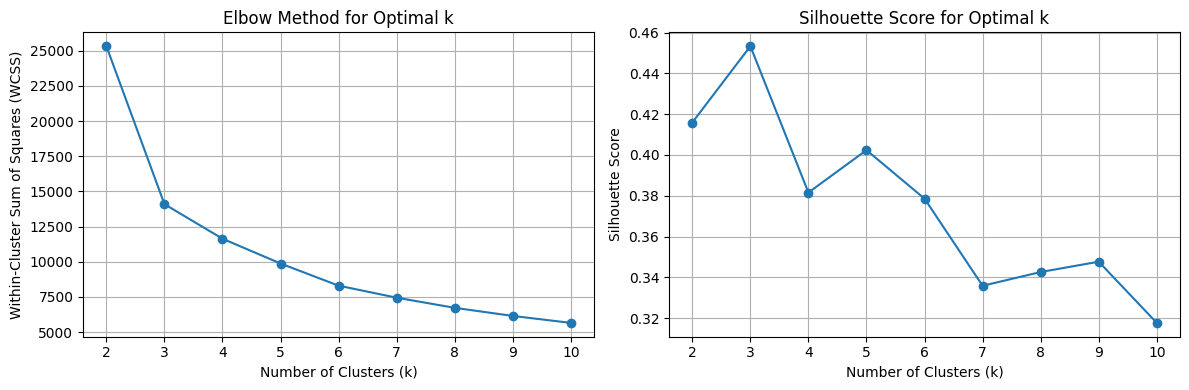

In [24]:
from sklearn.metrics import silhouette_score

k_values = range(2, 11)

wcss = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)

    wcss.append(kmeans.inertia_)


    silhouette_avg = silhouette_score(data, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Elbow method plot
ax1.plot(k_values, wcss, marker='o')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Within-Cluster Sum of Squares (WCSS)')
ax1.set_title('Elbow Method for Optimal k')
ax1.grid(True)

# Silhouette score plot
ax2.plot(k_values, silhouette_scores, marker='o')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score for Optimal k')
ax2.grid(True)

plt.tight_layout()
plt.show()


In [25]:
def random_centroids(data,k):
  centroids = []
  for i in range(k):
    centroid = data.apply(lambda x: float(x.sample()))
    centroids.append(centroid)
  return pd.concat(centroids,axis=1)

In [26]:
centroids = random_centroids(data,3)

In [27]:
centroids

,0,1,2
Recency,8.276596,6.826748,1.574468
Frequency,2.387665,1.515419,4.528634
Monetary,1.729204,7.491538,1.719481


In [28]:
def get_labels(data,centroids):
  distances = centroids.apply(lambda x:np.sqrt(((data-x)**2).sum(axis=1)))
  return distances.idxmin(axis=1)

In [29]:
labels = get_labels(data,centroids)

In [30]:
labels.value_counts()

2    2072
0     838
1     269
dtype: int64

In [31]:
def new_centroids(data,labels,k):
  return data.groupby(labels).apply(lambda x:np.exp(np.log(x).mean())).T

In [32]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

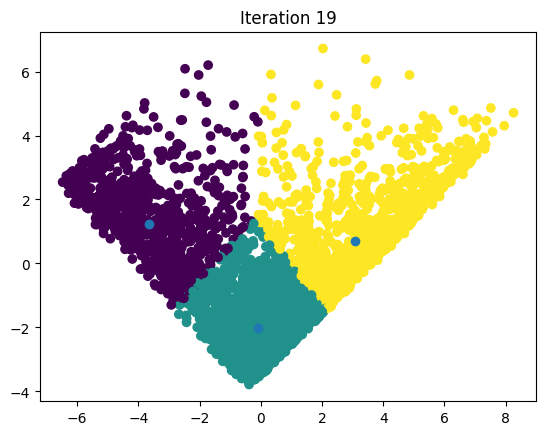

In [48]:
max_iterations = 100
centroid_count = 3

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids

    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [49]:
centroids

,0,1,2
Recency,6.973578,2.132150,1.884112
Frequency,1.763585,1.949517,4.533042
Monetary,2.043484,2.267434,5.520895


In [44]:
labels.value_counts()

2    1367
0     967
1     845
dtype: int64

In [43]:
retail[labels == 2][["CustomerID","LoyaltyLevel"] + features]

,CustomerID,LoyaltyLevel,Recency,Frequency,Monetary
2,12822,Gold,70,46,949
4,12824,Silver,59,25,397
6,12827,Gold,5,25,430
9,12832,Silver,31,27,383
16,12842,Gold,69,34,1119
...,...,...,...,...,...
3171,18274,Bronze,29,11,176
3172,18276,Silver,43,14,336
3173,18277,Bronze,57,8,110
3174,18278,Bronze,73,9,174


## Using SKlearn

In [45]:
kmeans = KMeans(n_clusters=3,max_iter= 100)
kmeans.fit(data)

KMeans(max_iter=100, n_clusters=3)

In [46]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2
Recency,7.223941,2.331878,2.100732
Frequency,1.908785,2.261901,5.217397
Monetary,2.192992,2.606320,6.242512


In [50]:
centroids

,0,1,2
Recency,6.973578,2.132150,1.884112
Frequency,1.763585,1.949517,4.533042
Monetary,2.043484,2.267434,5.520895
